<a href="https://colab.research.google.com/github/2303A52046/STAT_2303A52046/blob/main/Project(SML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_excel('/content/electricity.csv(keerthi).xlsx')
data.head(50)

,Utility.Number,Utility.Name,Utility.State,Utility.Type,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,...,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales,Retail.Total.Customers
0,34,City of Abbeville - (SC),SC,Municipal,13.7,10.8,7000,59000,0,66000,...,460,0.0,0,0,0.0,0,0,7536.0,58000,3844
1,55,City of Aberdeen - (MS),MS,Municipal,32.4,30.3,0,209454,0,209454,...,662,5638.0,120537,1,0.0,0,0,14797.0,204261,3229
2,59,City of Abbeville - (LA),LA,Municipal,28.9,22.0,0,137264,0,137264,...,887,3011.1,35881,27,0.0,0,0,12383.0,127579,5494
3,84,A & N Electric Coop,VA,Cooperative,154.0,162.4,596,743457,0,744053,...,4227,15516.0,176162,8,0.0,0,0,78507.0,704010,35934
4,87,City of Ada - (MN),MN,Municipal,2.1,2.2,0,20028,0,20028,...,255,190.0,2615,58,0.0,0,0,1593.0,20028,1185
5,97,Adams Electric Coop,IL,Cooperative,37.0,43.0,4612,183534,0,188146,...,225,0.0,0,0,0.0,0,0,23851.0,176102,8931
6,108,Adams-Columbia Electric Coop,WI,Cooperative,126.9,93.5,0,545904,0,545904,...,2347,15249.0,163408,937,0.0,0,0,69348.0,515186,37607
7,113,"Agway Energy Services, LLC",NY,Retail Power Marketer,65.0,67.0,0,300947,0,300947,...,4417,0.0,0,0,0.0,0,0,23676.8,293757,33413
8,118,"Adams Rural Electric Coop, Inc",OH,Cooperative,22.8,33.1,0,115777,0,115777,...,389,0.0,0,0,0.0,0,0,15093.0,108752,7479
9,122,Village of Arcade - (NY),NY,Municipal,26.9,41.4,0,172194,0,172194,...,497,1797.0,41133,15,0.0,0,0,7890.0,164984,4175


In [2]:
data.dtypes

,0
Utility.Number,int64
Utility.Name,object
Utility.State,object
Utility.Type,object
Demand.Summer Peak,float64
Demand.Winter Peak,float64
Sources.Generation,int64
Sources.Purchased,int64
Sources.Other,int64
Sources.Total,int64


In [3]:
y = data['Retail.Total.Customers']
x = data.drop(['Retail.Total.Customers'], axis=1)
print(x)
print(y)

      Utility.Number                     Utility.Name Utility.State  \
0                 34         City of Abbeville - (SC)            SC   
1                 55          City of Aberdeen - (MS)            MS   
2                 59         City of Abbeville - (LA)            LA   
3                 84              A & N Electric Coop            VA   
4                 87               City of Ada - (MN)            MN   
...              ...                              ...           ...   
3169           63169             Median Energy PA LLC            NJ   
3170           63232     National Gas & Electric, LLC            TX   
3171           63364        Mirabito Power & Gas, LLC            NY   
3172           63367  Commercial Energy of California            CA   
3173           63546       Provision Power & Gas, LLC            TX   

               Utility.Type  Demand.Summer Peak  Demand.Winter Peak  \
0                 Municipal                13.7                10.8   
1    

In [4]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
categorical_columns = ['Utility.Name','Utility.State','Utility.Type']
for column in categorical_columns:
    x[column] = labelencoder.fit_transform(x[column])
print(x)

      Utility.Number  Utility.Name  Utility.State  Utility.Type  \
0                 34           297             41             5   
1                 55           298             26             5   
2                 59           296             19             5   
3                 84             3             46             2   
4                 87           300             24             5   
...              ...           ...            ...           ...   
3169           63169          2048             32             7   
3170           63232          2123             44             7   
3171           63364          2085             35             7   
3172           63367          1512              4             7   
3173           63546          2374             44             7   

      Demand.Summer Peak  Demand.Winter Peak  Sources.Generation  \
0                   13.7                10.8                7000   
1                   32.4                30.3               

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training Features:", x_train)
print("Training Target:", y_train)
print("Testing Features:", x_test)
print("Testing Target:", y_test)

Training Features:       Utility.Number  Utility.Name  Utility.State  Utility.Type  \
1064            8548           762             18             5   
533             4237          1522             25             2   
864             6782          1729             24             2   
2599           20187          3094             42             5   
2409           18499          2649             11             2   
...              ...           ...            ...           ...   
3092           60402          2312              4             1   
1095            8774           779             20             5   
1130            9087          2741             28             5   
1294           10603          1947             25             2   
860             6764          2958             15             5   

      Demand.Summer Peak  Demand.Winter Peak  Sources.Generation  \
1064                 4.4                 3.3                   0   
533                 50.4                

In [7]:
x_min = x_train.min()
x_max = x_train.max()
x_train = (x_train - x_min) / (x_max - x_min)
x_test = (x_test - x_min) / (x_max - x_min)
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)
x_train

,Utility.Number,Utility.Name,Utility.State,Utility.Type,Demand.Summer Peak,Demand.Winter Peak,Sources.Generation,Sources.Purchased,Sources.Other,Sources.Total,...,Retail.Commercial.Sales,Retail.Commercial.Customers,Retail.Industrial.Revenue,Retail.Industrial.Sales,Retail.Industrial.Customers,Retail.Transportation.Revenue,Retail.Transportation.Sales,Retail.Transportation.Customers,Retail.Total.Revenue,Retail.Total.Sales
1064,0.133767,0.240379,0.346154,0.625,0.000149,0.000119,0.000010,0.000054,0.068894,0.000047,...,0.000113,0.000357,0.000079,0.000000,0.000000,0.0,0.0,0.0,0.000186,0.000155
533,0.065868,0.480126,0.480769,0.250,0.001704,0.002263,0.000010,0.000816,0.068894,0.000705,...,0.000514,0.000841,0.002857,0.002773,0.000580,0.0,0.0,0.0,0.001852,0.002266
864,0.105952,0.545426,0.461538,0.250,0.003257,0.002932,0.000010,0.001507,0.068894,0.001302,...,0.002325,0.005118,0.004728,0.004432,0.000219,0.0,0.0,0.0,0.004278,0.004436
2599,0.317084,0.976025,0.807692,0.625,0.002276,0.002630,0.000010,0.001159,0.068894,0.001001,...,0.001980,0.003944,0.003269,0.003739,0.000708,0.0,0.0,0.0,0.002356,0.003377
2409,0.290498,0.835647,0.211538,0.250,0.002655,0.001918,0.000010,0.000728,0.068894,0.000629,...,0.000390,0.000762,0.003231,0.001507,0.006942,0.0,0.0,0.0,0.002543,0.002022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.950481,0.729338,0.076923,0.125,0.024786,0.022345,0.000010,0.011225,0.068894,0.009698,...,0.027976,0.043732,0.008817,0.009478,0.001925,0.0,0.0,0.0,0.021458,0.031502
1095,0.137327,0.245741,0.384615,0.625,0.002300,0.002159,0.001301,0.000580,0.063928,0.000963,...,0.003097,0.004560,0.002143,0.001602,0.000262,0.0,0.0,0.0,0.003512,0.003226
1130,0.142256,0.864669,0.538462,0.625,0.001688,0.001220,0.000010,0.000751,0.068894,0.000649,...,0.000861,0.000973,0.002452,0.003586,0.000014,0.0,0.0,0.0,0.001581,0.002205
1294,0.166134,0.614196,0.480769,0.250,0.004596,0.007497,0.000010,0.002038,0.068894,0.001761,...,0.001585,0.005396,0.000840,0.000663,0.000092,0.0,0.0,0.0,0.005447,0.006091


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

[ 2.72418085e+04  7.59093230e+03  9.07098806e+02  5.73386806e+02
  3.50543328e+04  1.09056263e+03  1.77972886e+03  1.14965975e+04
  1.27605250e+04  1.63467855e+03  9.76558654e+03  7.06961133e+02
  1.73157681e+03  5.28206231e+04  2.44619695e+04  1.08399493e+04
  5.38516491e+03  5.80982282e+03  2.07796530e+03  2.77893872e+03
  7.67127150e+02  2.71030690e+03  5.79169908e+04  1.22439881e+04
  8.56000005e+03  8.98087668e+03  8.27859386e+04  8.97782913e+03
  6.33305781e+03  1.71624175e+05  8.07366320e+03  4.95704870e+04
  7.34842902e+02  2.32148355e+05  1.50737549e+04  5.43323262e+03
  1.32266379e+03  1.78941286e+04  9.39288700e+03  3.10777189e+04
  5.21190107e+03  1.31042883e+05  1.90366377e+03  4.21372739e+04
  3.04159241e+03  3.19636101e+04  1.68958118e+03  1.15631235e+03
  2.52159140e+04  4.00363782e+03  1.40291412e+04  5.19221179e+02
  2.31638737e+04  9.43125063e+02  1.30691650e+05  2.37250401e+03
  4.39174328e+01  1.32056644e+03  2.42981613e+03 -1.34645087e+00
  6.55499464e+05  1.16865

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9746.796086797987
R-squared: 0.9999998035374865


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9746.796086797987
R-squared: 0.9999998035374865


In [11]:
from sklearn import svm
model = svm.SVR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

[4663.69485253 4713.28393144 4648.77930721 4643.11171053 4728.26885644
 4653.67196592 4641.80303797 4753.71484134 4692.02095852 4645.77167468
 4646.46341364 4691.78809005 4644.08496668 4749.83208602 4719.74931703
 4720.01867978 4658.48607613 4654.96108638 4655.76117766 4632.64112867
 4644.52126848 4630.33402671 4728.74412811 4760.1548629  4665.56412501
 4746.71835156 4678.63278512 4682.00201822 4722.49997149 4670.39345046
 4638.65080285 4738.5970115  4645.84597309 4755.91485052 4704.031832
 4743.85648836 4639.344919   4743.98342987 4637.80984793 4718.86386182
 4729.30747465 4660.12457874 4703.45181282 4676.63850549 4676.12470414
 4636.41933092 4690.79683498 4643.4148394  4687.26956674 4753.85795559
 4632.3990162  4695.6579709  4634.83221131 4647.07455192 4666.21867117
 4676.80454064 4683.36207147 4654.87173053 4667.53729593 4702.64477697
 4696.66026103 4639.87553411 4632.32326625 4696.13678896 4693.55714522
 4650.54744092 4727.41727732 4633.71044681 4693.82338526 4672.95954562
 4761.15

In [12]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

[ 2.67976609e+04  7.63267405e+03  8.17082100e+02  6.21996431e+02
  3.54085050e+04  1.12319156e+03  1.84635621e+03  1.12756959e+04
  1.29274882e+04  1.67511239e+03  9.75253865e+03  5.45214014e+02
  1.77756266e+03  5.27836026e+04  2.44442643e+04  1.09750977e+04
  5.33289859e+03  5.87964523e+03  2.15417582e+03  2.73322122e+03
  7.98474058e+02  2.80817537e+03  5.77703669e+04  1.21141431e+04
  8.34070027e+03  8.95224429e+03  7.86214700e+04  8.85644601e+03
  6.33278994e+03  1.72784658e+05  8.08191148e+03  5.00803453e+04
  7.75052616e+02  2.31420838e+05  1.49760139e+04  5.48549868e+03
  1.39016817e+03  1.79817534e+04  9.33134528e+03  3.10437577e+04
  5.06637941e+03  1.32219667e+05  1.81877678e+03  4.18763937e+04
  3.10523548e+03  3.18889581e+04  1.70423044e+03  1.23100769e+03
  2.49906203e+04  3.64214857e+03  1.41487378e+04  4.91037576e+02
  2.29846919e+04  1.10698329e+03  1.31033188e+05  2.41518732e+03
 -2.26520145e+03  1.33327827e+03  2.37511765e+03 -4.79318871e+02
  6.54697555e+05  1.16828

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5338273.651690675
R-squared: 0.999892398419947


In [14]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)

[ 2.75577755e+04  6.10422989e+03  4.04415096e+03 -1.07892677e+02
  3.53345944e+04  1.18318645e+03  1.48813084e+03  1.26628107e+04
  1.21708431e+04  1.05973901e+03  9.89617942e+03  3.05825767e+03
  1.58816217e+03  5.29832757e+04  2.78214649e+04  1.03806327e+04
  5.48976393e+03  2.90381289e+03  3.42601327e+03  3.30474435e+03
 -9.01579995e+02  1.86477890e+03  6.20879865e+04  1.49434481e+04
  8.55081896e+03  1.00116361e+04  1.39716257e+05  9.26890549e+03
  1.32355917e+04  1.80143165e+05  6.54588650e+03  4.80226908e+04
  2.17245817e+02  2.57546615e+05  1.53651242e+04  4.89193983e+03
  5.20834610e+02  1.82279613e+04  1.27617888e+04  3.43192655e+04
  6.98456025e+03  1.03924638e+05  5.70111591e+02  4.57459334e+04
  7.89801501e+02  3.21444995e+04  3.29031306e+01  1.03267996e+03
  2.66959761e+04  5.31559418e+03  1.46648506e+04 -2.15255362e+03
  2.15911581e+04 -2.10735966e+01  1.08863805e+05  4.68051769e+02
  3.43421126e+03 -9.27250242e+02  2.01864746e+03  4.89343300e+01
  4.72349617e+05  1.23759

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 380188714.7135294
R-squared: 0.9923366786548038


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10422893014.554897
R-squared: 0.7899096542691435


In [18]:
from sklearn.utils import resample

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
n_iterations = 10
mean_squared_error_lr  = []
mean_absolute_error_lr=[]
root_mean_squared_error_lr=[]
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(x, y, replace=True, n_samples=len(x))
    RR=LinearRegression()
    mm = RR.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = mm.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mean_squared_error_lr.append(mse)
    mean_absolute_error_lr.append(mae)
    root_mean_squared_error_lr.append(rmse)
print("Mean Squared Error:", mean_squared_error_lr)
print("Mean Absoulte Error:",mean_absolute_error_lr)
print("Root mean squared Error:",root_mean_squared_error_lr)

Mean Squared Error: [52312446229.61448, 52310813679.37693, 52310846632.65629, 52310801618.65647, 52310774063.16966, 52310380849.76727, 49396638884.168236, 52310857911.8289, 52311120829.705696, 52310758060.93724]
Mean Absoulte Error: [51968.249804635794, 51955.166310035434, 51955.617592872055, 51957.294300136244, 51955.240124678225, 51951.50604471468, 60616.305687418935, 51956.616823885764, 51958.22038430473, 51954.803104480445]
Root mean squared Error: [228719.14268292996, 228715.57375783776, 228715.64579769416, 228715.5473916377, 228715.48715198468, 228714.62753782774, 222253.5463927814, 228715.67045532516, 228716.245224745, 228715.4521691467]


In [20]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
n_iterations = 10
mean_squared_error_svm  = []
mean_absolute_error_svm=[]
root_mean_squared_error_svm=[]
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(x, y, replace=True, n_samples=len(x))
    ss=SVR()
    sv = ss.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = sv.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mean_squared_error_svm.append(mse)
    mean_absolute_error_svm.append(mae)
    root_mean_squared_error_svm.append(rmse)
print("Mean Squared Error:", mean_squared_error_svm)
print("Mean Absoulte Error:",mean_absolute_error_svm)
print("Root mean squared Error:",root_mean_squared_error_svm)

Mean Squared Error: [51836659900.27052, 51850891090.60403, 51820984296.93505, 51847281238.295204, 51849697690.39344, 51794160839.92113, 51869827631.458206, 51833366043.48856, 51869180251.69687, 51840530128.53291]
Mean Absoulte Error: [50090.15535598207, 50099.12296095226, 50083.53658788828, 50096.65931786633, 50098.308712002785, 50077.89482729809, 50113.994710535895, 50088.38742758768, 50113.38325345446, 50092.40903832763]
Root mean squared Error: [227676.65646761094, 227707.90739586542, 227642.2287207166, 227699.98076041904, 227705.2869179665, 227583.30527505995, 227749.4843714431, 227669.4227240201, 227748.06311294256, 227685.15570526972]


In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
n_iterations = 10
mean_squared_error_l  = []
mean_absolute_error_l=[]
root_mean_squared_error_l=[]
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(x, y, replace=True, n_samples=len(x))
    cc=LinearRegression()
    lr = cc.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = lr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mean_squared_error_l.append(mse)
    mean_absolute_error_l.append(mae)
    root_mean_squared_error_l.append(rmse)
print("Mean Squared Error:", mean_squared_error_l)
print("Mean Absoulte Error:",mean_absolute_error_l)
print("Root mean squared Error:",root_mean_squared_error_l)

Mean Squared Error: [52311709176.94898, 419818835066.1422, 52312281988.31261, 52312381832.22035, 52310337185.33166, 52310989037.07864, 52311389629.50408, 52311579446.15371, 52311839030.80251, 52311657788.97574]
Mean Absoulte Error: [51963.723619105534, 582274.2429771953, 51969.27319666199, 51970.89916799332, 51951.087467194964, 51959.89639482944, 51961.37244822757, 51963.80597743087, 51965.29674920614, 51963.85738148457]
Root mean squared Error: [228717.5314158252, 647934.2829841173, 228718.7836368334, 228719.00190456488, 228714.53208165776, 228715.95711073297, 228716.83285124443, 228717.24781081488, 228717.81528950148, 228717.41907641347]


In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
n_iterations = 10
mean_squared_error_r  = []
mean_absolute_error_r=[]
root_mean_squared_error_r=[]
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(x, y, replace=True, n_samples=len(x))
    tt=Ridge()
    rr = tt.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = rr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mean_squared_error_r.append(mse)
    mean_absolute_error_r.append(mae)
    root_mean_squared_error_r.append(rmse)
print("Mean Squared Error:", mean_squared_error_r)
print("Mean Absoulte Error:",mean_absolute_error_r)
print("Root mean squared Error:",root_mean_squared_error_r)

Mean Squared Error: [52311459438.57579, 52310347106.51618, 52310725600.460075, 52310743492.009926, 52310787268.10123, 52311825176.52085, 52310443602.45742, 52311689459.92274, 52311553591.1585, 52310870128.8905]
Mean Absoulte Error: [51961.59292875894, 51951.65594155078, 51954.279468080036, 51954.857036257476, 51954.95826564823, 51965.113360748284, 51952.07480859997, 51968.295378671144, 51962.98298041213, 51956.21218928269]
Root mean squared Error: [228716.98546145583, 228714.55377066886, 228715.38120655567, 228715.42031968446, 228715.51601957667, 228717.7850026553, 228714.76472335018, 228717.48831237794, 228717.19128906445, 228715.69716329157]


In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
n_iterations = 10
mean_squared_error_knr  = []
mean_absolute_error_knr=[]
root_mean_squared_error_knr=[]
for _ in range(n_iterations):
    X_train_bootstrap, y_train_bootstrap = resample(x, y, replace=True, n_samples=len(x))
    tt=KNeighborsRegressor()
    rr = tt.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred = rr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mean_squared_error_knr.append(mse)
    mean_absolute_error_knr.append(mae)
    root_mean_squared_error_knr.append(rmse)
print("Mean Squared Error:", mean_squared_error_knr)
print("Mean Absoulte Error:",mean_absolute_error_knr)
print("Root mean squared Error:",root_mean_squared_error_knr)

Mean Squared Error: [52302293659.20756, 52301463754.37606, 52301318534.19055, 52301007361.27874, 52296818652.75968, 52297523454.42645, 52301816448.28945, 52297481992.944885, 52298788183.33448, 52297357610.42015]
Mean Absoulte Error: [51875.28818897637, 51867.699527559045, 51866.37448818899, 51863.54015748032, 51826.420157480316, 51832.59905511811, 51870.917480314965, 51832.23559055119, 51843.71118110236, 51831.14519685039]
Root mean squared Error: [228696.9472013292, 228695.1327736908, 228694.81527614602, 228694.1349516396, 228684.97688470854, 228686.51786764004, 228695.9038730022, 228686.42721627554, 228689.283053086, 228686.1552661642]


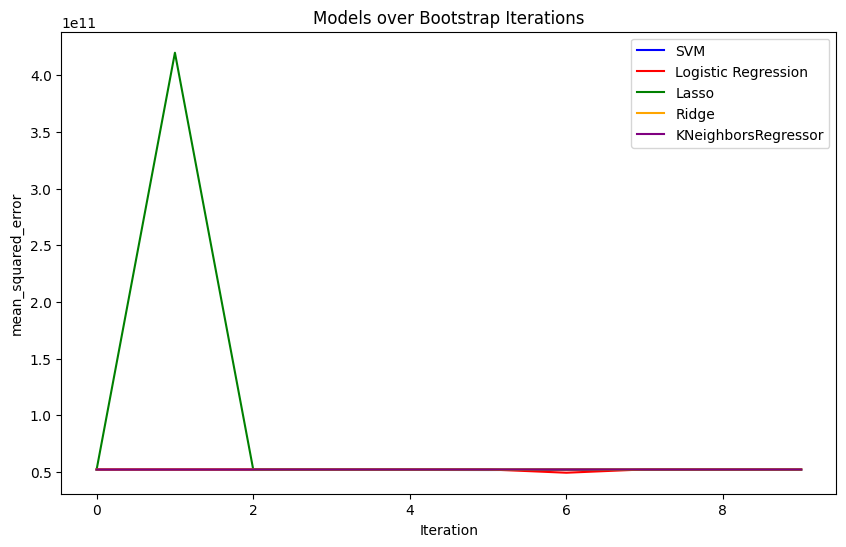

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( mean_squared_error_svm, color='blue', label='SVM')
plt.plot(mean_squared_error_lr, color='red', label='Logistic Regression')
plt.plot(mean_squared_error_l, color='green', label='Lasso')
plt.plot(mean_squared_error_r, color='orange', label='Ridge')
plt.plot(mean_squared_error_knr, color='purple', label='KNeighborsRegressor')
plt.xlabel('Iteration')
plt.ylabel('mean_squared_error')
plt.title('Models over Bootstrap Iterations')
plt.legend()
plt.show()

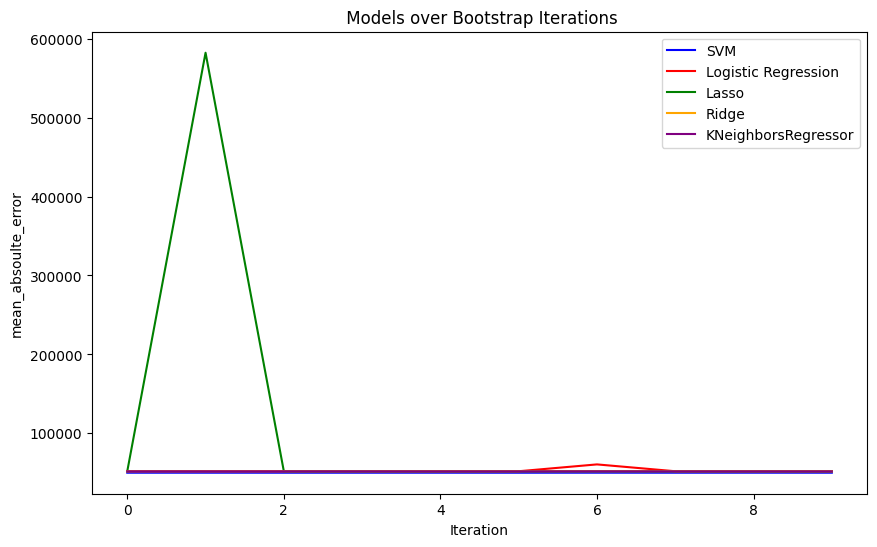

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( mean_absolute_error_svm, color='blue', label='SVM')
plt.plot(mean_absolute_error_lr, color='red', label='Logistic Regression')
plt.plot(mean_absolute_error_l, color='green', label='Lasso')
plt.plot(mean_absolute_error_r, color='orange', label='Ridge')
plt.plot(mean_absolute_error_knr, color='purple', label='KNeighborsRegressor')
plt.xlabel('Iteration')
plt.ylabel('mean_absoulte_error')
plt.title(' Models over Bootstrap Iterations')
plt.legend()
plt.show()

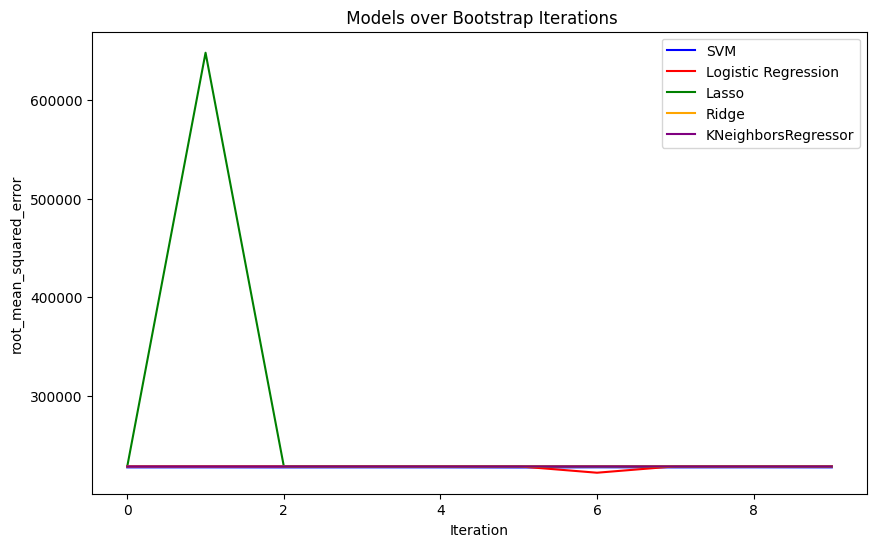

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot( root_mean_squared_error_svm, color='blue', label='SVM')
plt.plot(root_mean_squared_error_lr, color='red', label='Logistic Regression')
plt.plot(root_mean_squared_error_l, color='green', label='Lasso')
plt.plot(root_mean_squared_error_r, color='orange', label='Ridge')
plt.plot(root_mean_squared_error_knr, color='purple', label='KNeighborsRegressor')
plt.xlabel('Iteration')
plt.ylabel('root_mean_squared_error')
plt.title(" Models over Bootstrap Iterations")
plt.legend()
plt.show()